In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


In [2]:
df = pd.read_csv("../data/raw/AAPL_raw.csv", parse_dates=["Date"], index_col="Date")

In [3]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2017-09-18,37.062016,37.489466,36.905518,37.398370,113077600
2017-09-19,37.076027,37.318951,37.008291,37.258218,83242400
2017-09-20,36.454689,36.966224,35.931471,36.882136,211805600
2017-09-21,35.828720,36.391647,35.679230,36.391647,150046800
2017-09-22,35.478336,35.567098,35.167676,35.396582,186581600
...,...,...,...,...,...
2025-09-11,230.029999,230.449997,226.649994,226.880005,50208600
2025-09-12,234.070007,234.509995,229.020004,229.220001,55824200
2025-09-15,236.699997,238.190002,235.029999,237.000000,42699500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2017-09-18 to 2025-09-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2011 non-null   float64
 1   High    2011 non-null   float64
 2   Low     2011 non-null   float64
 3   Open    2011 non-null   float64
 4   Volume  2011 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.3 KB


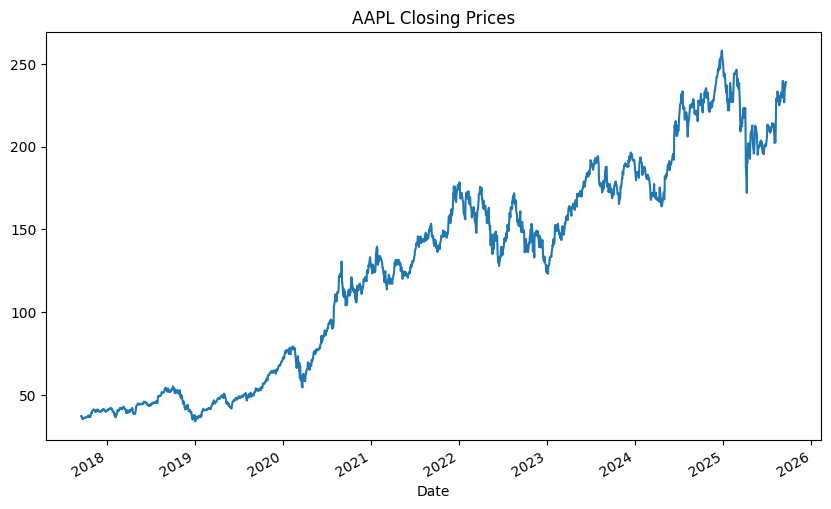

In [5]:
df['Close'].plot(title="AAPL Closing Prices", figsize=(10, 6))
plt.show()

In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,127.376759,128.668955,125.950262,127.252179,9.662238e+07
std,64.182351,64.769132,63.512540,64.113495,5.411586e+07
min,33.832432,34.672353,33.787223,34.258340,2.323470e+07
25%,53.701107,54.099823,52.921405,53.584694,5.897220e+07
50%,138.144409,139.930473,135.982218,138.270329,8.356960e+07
75%,175.772415,177.328087,173.968191,175.392472,1.170898e+08
max,258.103729,259.179926,256.718662,257.276679,4.265100e+08


In [7]:
date_diff = df.index.to_series().diff().value_counts()
date_diff

Date
1 days    1571
3 days     362
4 days      55
2 days      22
Name: count, dtype: int64

In [8]:
# Check missing/nulls
df.isna().sum()


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [9]:
# Sort, drop dups, forward-fill
df = df.sort_index()
df = df[~df.index.duplicated()]
df = df.ffill().dropna()

df.info()        # confirm no NaNs


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2017-09-18 to 2025-09-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2011 non-null   float64
 1   High    2011 non-null   float64
 2   Low     2011 non-null   float64
 3   Open    2011 non-null   float64
 4   Volume  2011 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.3 KB


In [10]:
df["Daily_Return"] = df["Close"].pct_change()
df["Log_Return"]  = np.log(df["Close"] / df["Close"].shift(1))
df["MA_20"] = df["Close"].rolling(20).mean()
df["MA_50"] = df["Close"].rolling(50).mean()

In [11]:
df.tail()

,Close,High,Low,Open,Volume,Daily_Return,Log_Return,MA_20,MA_50
Date,,,,,,,,,
2025-09-11,230.029999,230.449997,226.649994,226.880005,50208600,0.014286,0.014185,231.642999,220.563703
2025-09-12,234.070007,234.509995,229.020004,229.220001,55824200,0.017563,0.017411,231.707500,221.001120
2025-09-15,236.699997,238.190002,235.029999,237.000000,42699500,0.011236,0.011173,231.963000,221.468961
2025-09-16,238.149994,241.220001,236.320007,237.179993,63421100,0.006126,0.006107,232.325999,222.037722
2025-09-17,238.990005,240.100006,237.729996,238.970001,46435200,0.003527,0.003521,232.747500,222.622083


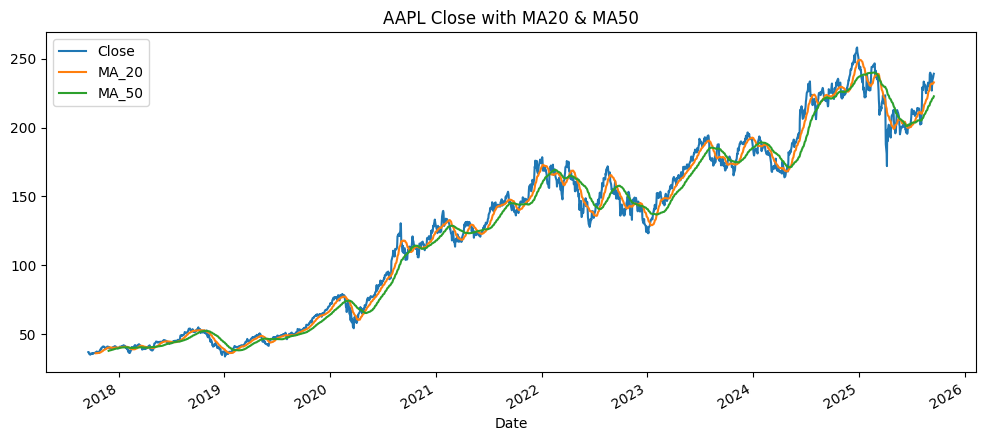

In [12]:
df[["Close","MA_20","MA_50"]].plot(figsize=(12,5), title="AAPL Close with MA20 & MA50")
plt.show()

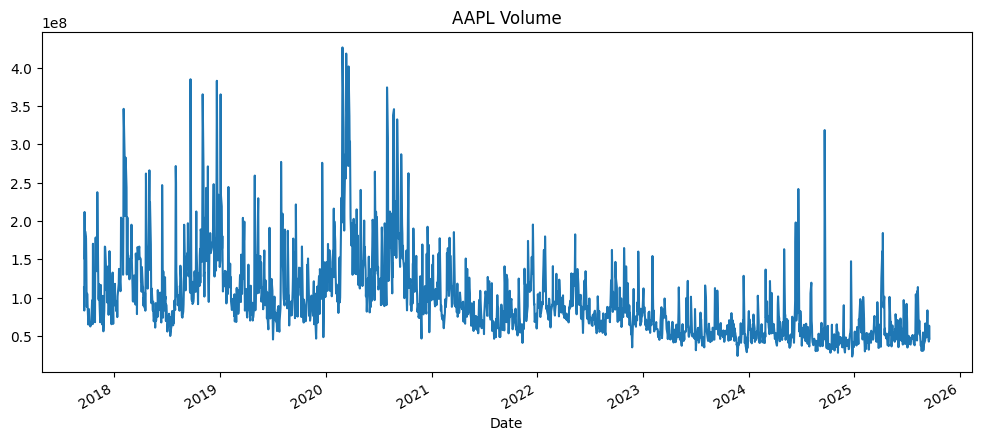

In [13]:
df['Volume'].plot(figsize=(12,5), title="AAPL Volume")
plt.show()

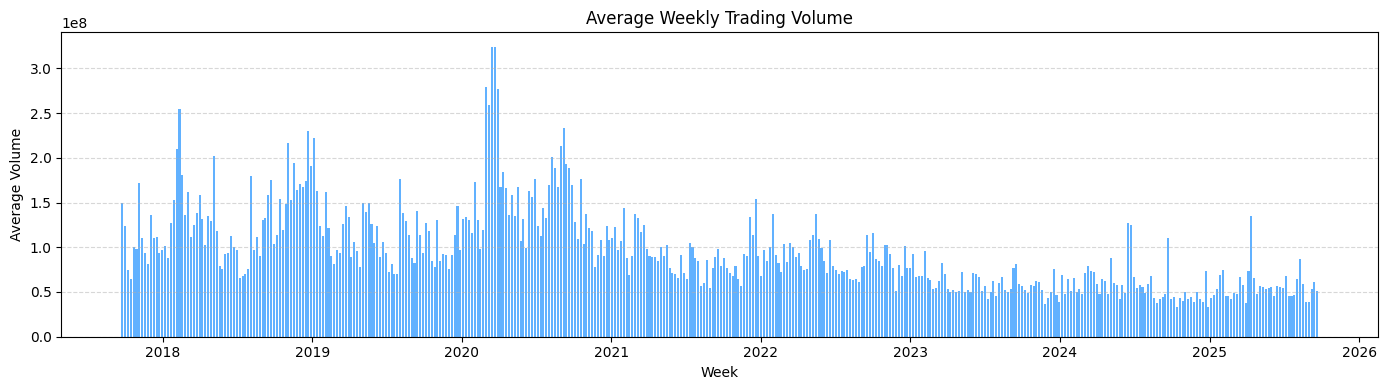

In [14]:
# Plot average weekly trading volume as a bar chart for better clarity

df_weekly = df['Volume'].resample('W').mean()  # Resample to weekly average

plt.figure(figsize=(14, 4))
plt.bar(df_weekly.index, df_weekly.values, width=5, color='dodgerblue', alpha=0.7)
plt.title('Average Weekly Trading Volume')
plt.ylabel('Average Volume')
plt.xlabel('Week')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

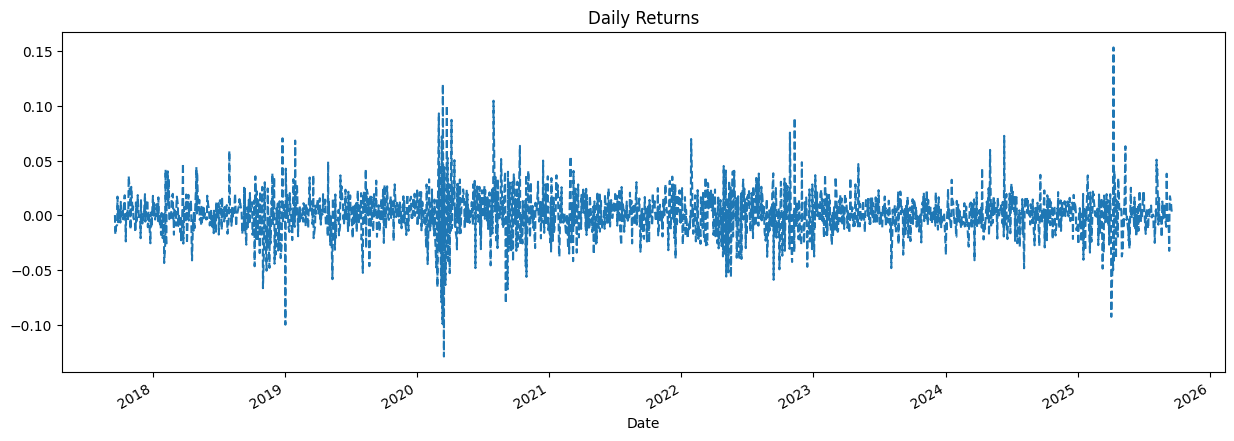

In [15]:
df['Daily_Return'].plot(figsize=(15,5), title="Daily Returns", linestyle='--')
plt.show()

Text(0.5, 1.0, 'Avg Daily Returns')

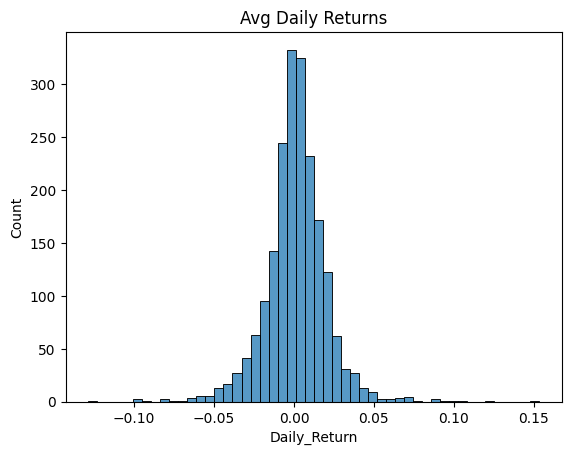

In [18]:
import seaborn as sns
sns.histplot(df['Daily_Return'], bins=50)
plt.title("Avg Daily Returns")

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

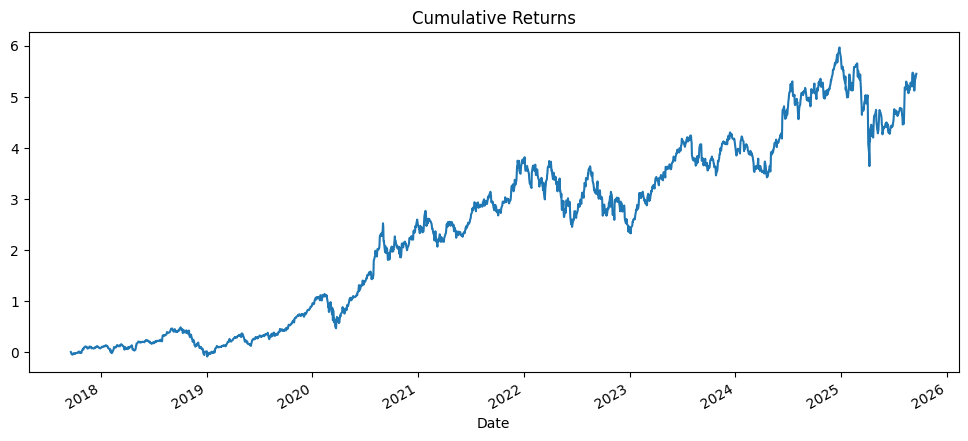

In [19]:
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
df['Cumulative_Return'].plot(figsize=(12,5), title="Cumulative Returns")

In [20]:
df

,Close,High,Low,Open,Volume,Daily_Return,Log_Return,MA_20,MA_50,Cumulative_Return
Date,,,,,,,,,,
2017-09-18,37.062016,37.489466,36.905518,37.398370,113077600,NaN,NaN,NaN,NaN,NaN
2017-09-19,37.076027,37.318951,37.008291,37.258218,83242400,0.000378,0.000378,NaN,NaN,0.000378
2017-09-20,36.454689,36.966224,35.931471,36.882136,211805600,-0.016758,-0.016900,NaN,NaN,-0.016387
2017-09-21,35.828720,36.391647,35.679230,36.391647,150046800,-0.017171,-0.017320,NaN,NaN,-0.033277
2017-09-22,35.478336,35.567098,35.167676,35.396582,186581600,-0.009779,-0.009828,NaN,NaN,-0.042731
...,...,...,...,...,...,...,...,...,...,...
2025-09-11,230.029999,230.449997,226.649994,226.880005,50208600,0.014286,0.014185,231.642999,220.563703,5.206624
2025-09-12,234.070007,234.509995,229.020004,229.220001,55824200,0.017563,0.017411,231.707500,221.001120,5.315631
2025-09-15,236.699997,238.190002,235.029999,237.000000,42699500,0.011236,0.011173,231.963000,221.468961,5.386593


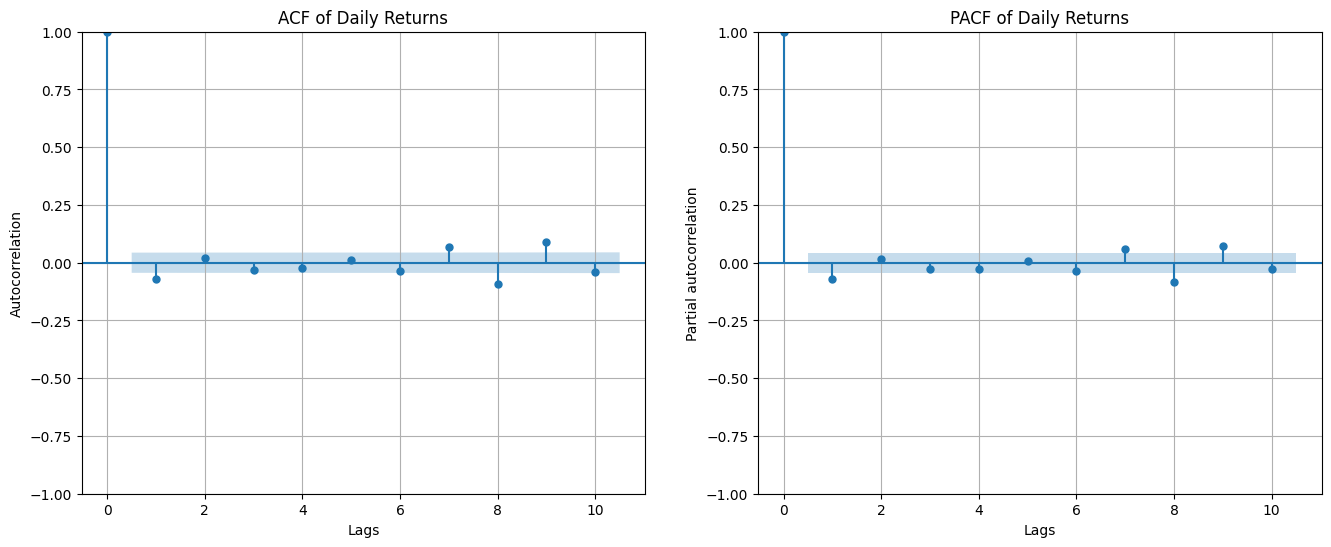

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plot_acf(df['Daily_Return'].dropna(), lags=10, ax=axes[0])
axes[0].set_xlabel("Lags")
axes[0].set_ylabel("Autocorrelation")
axes[0].set_title("ACF of Daily Returns")
axes[0].grid(True)

plot_pacf(df['Daily_Return'].dropna(), lags=10, ax=axes[1])
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Partial autocorrelation")
axes[1].set_title("PACF of Daily Returns")
axes[1].grid(True)

plt.show()


<Axes: title={'center': 'Rolling 10-day Volatility'}, xlabel='Date'>

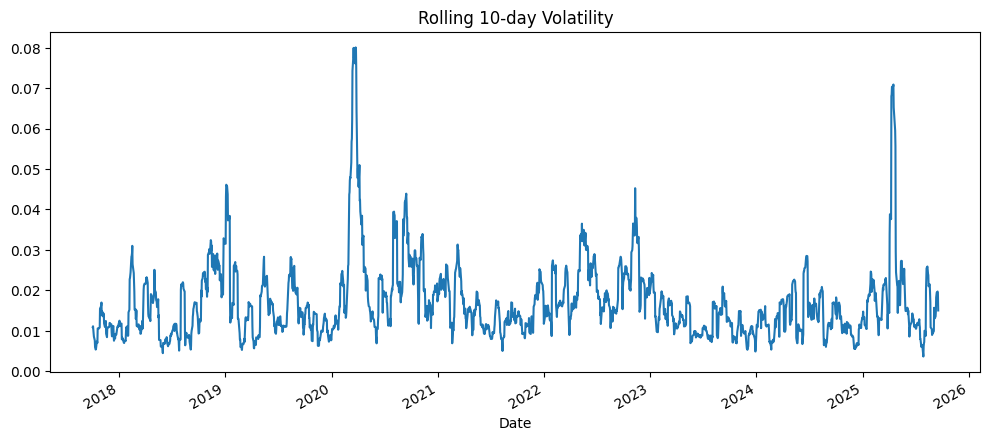

In [22]:
df['Daily_Return'].rolling(10).std().plot(figsize=(12,5), title="Rolling 10-day Volatility")

In [23]:
PROC = Path("../data/processed")
PROC.mkdir(exist_ok=True, parents=True)
out = PROC / "AAPL_clean.csv"
df.dropna().to_csv(out)
print(f"Saved cleaned → {out}")


Saved cleaned → ..\data\processed\AAPL_clean.csv
